## Analyzing CIA Factbook Data Using SQLite and Python

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('factbook.db')
q = 'select * from sqlite_master where type="table"'
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [2]:
q1 = 'select * from facts'
pd.read_sql_query(q1,conn).head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


In [3]:
sumq = 'select MIN(population),MAX(population),MIN(population_growth),MAX(population_growth) from facts'
pd.read_sql_query(sumq,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [4]:
q = 'select name, MIN(population) from facts'
pd.read_sql_query(q,conn)

,name,MIN(population)
0,Antarctica,0


In [5]:
q = 'select name, MAX(population) from facts'
pd.read_sql_query(q,conn)

,name,MAX(population)
0,World,7256490011


In [6]:
no_outlier = 'select * from facts where population != (select MAX(population) from facts) and population != (select MIN(population) from facts)'
df = pd.read_sql_query(no_outlier,conn)

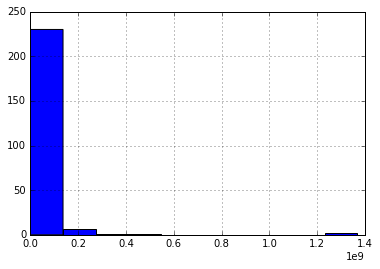

In [7]:
%matplotlib inline
df['population'].hist()

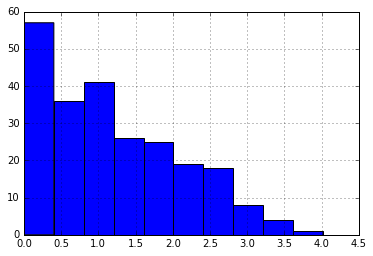

In [8]:
df['population_growth'].hist()

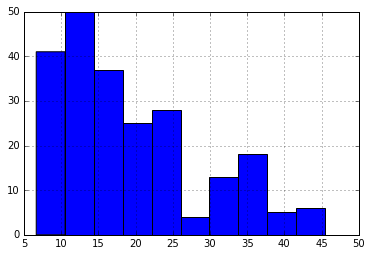

In [9]:
df['birth_rate'].hist()

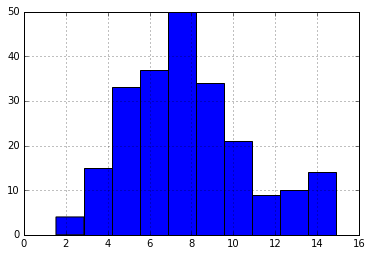

In [10]:
df['death_rate'].hist()